In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from utils.mnist_utils import preprocess,noise,display

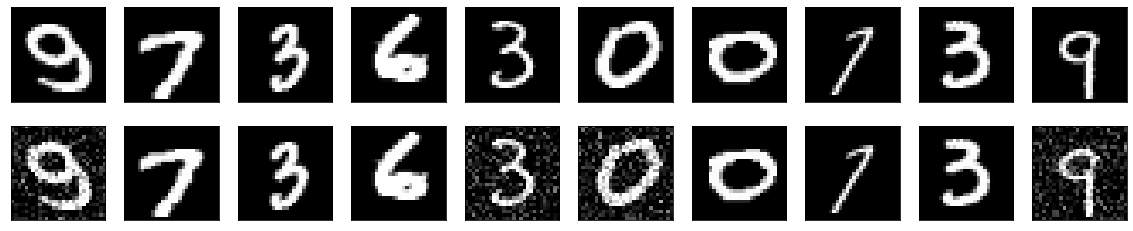

In [5]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

n_train_samples = len(train_data)
n_test_samples = len(test_data)
all_train_idxs = [i for i in range(n_train_samples)]
all_test_idxs = [i for i in range(n_test_samples)]

noise_percent = 0.5
noise_train_idxs = random.sample(all_train_idxs,int(noise_percent*n_train_samples))
noise_test_idxs = random.sample(all_test_idxs,int(noise_percent*n_test_samples))
# Create a copy of the data with added noise
noisy_train_data = noise(train_data,noise_train_idxs)
noisy_test_data = noise(test_data,noise_test_idxs)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [5]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 32)        9248

In [6]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 6s 7ms/step - loss: 0.2460 - val_loss: 0.0726
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0721 - val_loss: 0.0692
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0693 - val_loss: 0.0678
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0681 - val_loss: 0.0669
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0673 - val_loss: 0.0664
Epoch 6/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0667 - val_loss: 0.0659TA: 0s - loss: 0.0
Epoch 7/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0659 - val_loss: 0.0652
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0656 - val_loss: 0.0649
Epoch 10/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0653 

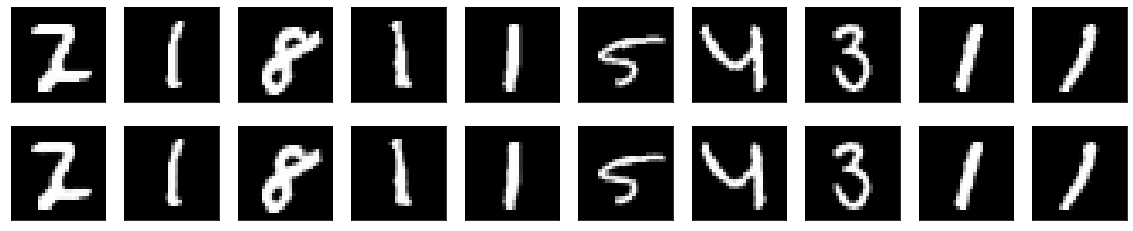

In [7]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [17]:
def display(array1, array2,array3):
    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]
    images3 = array3[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2, image3) in enumerate(zip(images1, images2,images3)):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(image3.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


    plt.show()

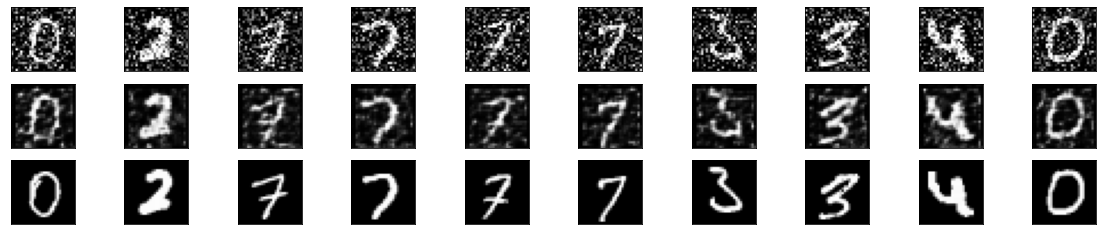

In [19]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data,predictions,test_data)